In [25]:
from scipy.stats import entropy

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import seaborn as sns
from typing import List

In [26]:
# example
# Scipy's entropy function will calculate entropy if fed 1 vector
# and  KL divergence if feed two vectors p and q,
# each representing a probability distribution.
# If the vectors aren't pdfs, it will normalize then first.

# p is used as weights

p = [0.2, 1.8]
q = [1.8, 0.2]
entropy(p, q, base=2)

2.5359400011538504

In a 1872 manuscript of The Fixation of Belief (W3 295) C. S. Peirce gives the following
example.

“ When we have drawn a thousand times, if about half have been white, we have great confidence
in this result. We now feel pretty sure that, if we were to make a large number of bets upon the
color of single beans drawn from the bag, we could approximately insure ourselves in the long
run by betting each time upon the white, a confidence which would be entirely wanting if, instead
of sampling the bag by 1000 drawings, we had done so by only two. ”

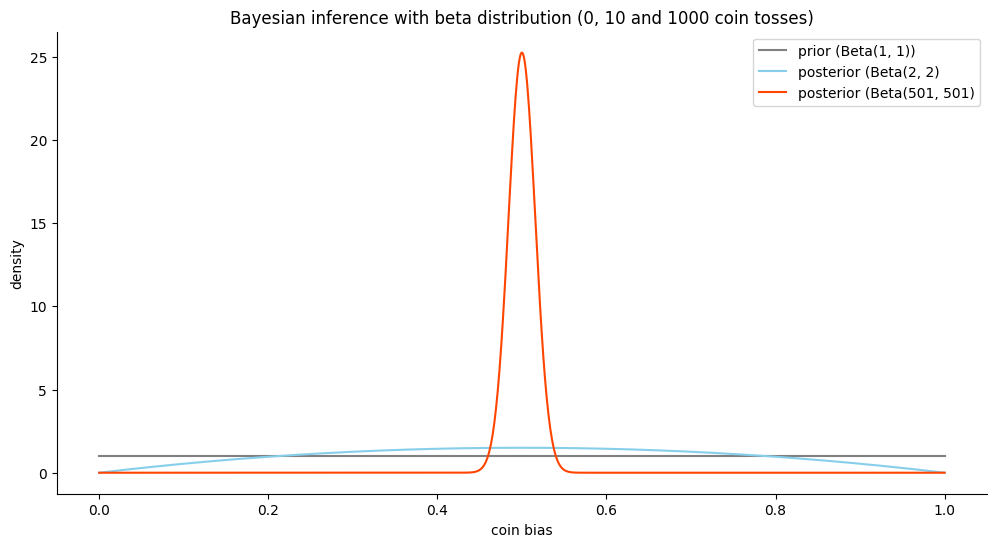

In [28]:
true_prob_heads = 0.5
num_tosses_2 = 2
num_tosses_1000 = 1000

x = np.linspace(0, 1, 1000)
prior = beta.pdf(x, 1, 1)
posterior_2 = beta.pdf(x, 2, 2)
posterior_1000 = beta.pdf(x, 501, 501)

plt.figure(figsize=(12, 6))
plt.plot(x, prior, label="prior (Beta(1, 1))", color="grey")
plt.plot(x, posterior_2, label="posterior (Beta(2, 2)", color="skyblue")
plt.plot(x, posterior_1000, label="posterior (Beta(501, 501)", color="orangered")
plt.title("Bayesian inference with beta distribution (0, 10 and 1000 coin tosses)")
plt.xlabel("coin bias")
plt.ylabel("density")
plt.legend()
sns.despine()
plt.show()

How much information a distribution contains will be measured in its entropy. `H = -sum(p * log(p))`. 
We want to normalize it to make insensitive to our grid size choice as long as it is kept fixed,
and we want it to be scaled between 0 and 1 for interpretability. So we use $1- \frac{H(p)}{H(uniform)}$


In [32]:
def weight(posterior: List[float], base=2) -> float:

    grid_length = len(posterior)
    x = np.linspace(0, 1, grid_length)
    uniform = beta.pdf(x, 1, 1)
    entropy_uniform = entropy(uniform, base=base)
    entropy_posterior = entropy(posterior, base=base)
    return 1 - entropy_posterior / entropy_uniform


print(weight(prior), weight(posterior_2), weight(posterior_1000))

0.0 0.01825506826172696 0.39529270774644865


Now, in application we want to also compare the prior to the posterior, answering the question of how much **more** confident we are
after obtaining the evidence as compared to our point of departure. Notably, the prior doesn't have to be uniform. Here, one conceptualization (which has the feature of being on the same scale) is simply the difference in weights of the distributions.

In [34]:
# imagie our prior is in fact obtained by having seen 1 head and 1 tail already.


def weight_delta(prior: List[str], posterior: List[str]) -> float:
    return weight(posterior) - weight(prior)


print(weight_delta(posterior_2, posterior_1000))

0.3770376394847217


Another would be to take the proportionate difference between them, except now it's a bit harder to understand the scale.



In [35]:
def weight_comparative_prop(prior: List[str], posterior: List[str]) -> float:
    return weight(posterior) / weight(prior)


print(weight_comparative_prop(posterior_2, posterior_1000))

21.653860839031083
